# 날짜 및 시간 데이터 처리 - datetime.date

In [12]:
from datetime import date

# 생성 & 속성
d = date(2025, 8, 12)
print(d.year, d.month, d.day)   # 2025 8 12

# 오늘
today = date.today()

# 교체(replace)와 비교/산술
d_next_year = d.replace(year=2026)
print(d_next_year > d)          # True

# 날짜 차이는 timedelta
delta = d_next_year - d
print(delta.days)               # 365(윤년에 따라 366일일 수도 있다)

2025 8 12
True
365


# 날짜 및 시간 데이터 처리 - datetime.time

In [1]:
from datetime import time, timezone

# 시, 분, 초, 마이크로초, tzinfo(선택)
t = time(14, 30, 5, 123456)
print(t.hour, t.minute, t.second, t.microsecond)  # 14 30 5 123456

# 시간대 보유(time 자체에 tzinfo 가능하지만, 단독 활용성은 제한적)
t_utc = time(14, 30, tzinfo=timezone.utc)
print(t_utc.isoformat())        # '14:30:00+00:00'

14 30 5 123456
14:30:00+00:00


# 날짜 및 시간 데이터 처리 - datetime.datetime

In [2]:
from datetime import datetime, timedelta, timezone
from zoneinfo import ZoneInfo  # Python 3.9+

# 현재 시각(UTC 권장)
now_utc = datetime.now(timezone.utc)
print(now_utc)

# 시간대 변환 (Seoul)
now_seoul = now_utc.astimezone(ZoneInfo("Asia/Seoul"))
print(now_seoul)

# 명시적 생성(서울 시간대)
dt = datetime(2025, 1, 1, 9, 0, tzinfo=ZoneInfo("Asia/Seoul"))

# 요일: weekday() 월=0..일=6, isoweekday() 월=1..일=7
print(dt.weekday(), dt.isoweekday())  # 2 3 (예시)

# 파싱/포맷
parsed = datetime.strptime("2024-09-30 08:15", "%Y-%m-%d %H:%M")
print(parsed.strftime("%Y-%m-%d %H:%M:%S"))  # '2024-09-30 08:15:00'

# 두 datetime 차이
start = datetime(2025, 8, 1, 0, 0, tzinfo=ZoneInfo("Asia/Seoul"))
end   = datetime(2025, 8, 12, 14, 0, tzinfo=ZoneInfo("Asia/Seoul"))
gap = end - start
print(gap.days, gap.total_seconds())  # 일수, 총 초

2025-08-12 06:45:25.117471+00:00
2025-08-12 15:45:25.117471+09:00
2 3
2024-09-30 08:15:00
11 1000800.0


# timedelta: 기간(차이) 다루기

In [15]:
from datetime import datetime, timedelta

td = timedelta(days=2, hours=3, minutes=30)
print(td)                        # 2 days, 3:30:00

base = datetime(2025, 8, 12, 10, 0)
after = base + td                # 덧셈/뺄셈 가능
print(after)                     # 2025-08-14 13:30:00

# 일 단위 부동소수점 환산
days = td / timedelta(days=1)    # 2.145833...
print(days)

# 정수 배 스케일링
double = 2 * td                  # 4 days, 7:00:00
print(double)

2 days, 3:30:00
2025-08-14 13:30:00
2.1458333333333335
4 days, 7:00:00


# datetime 생성/포맷팅/산술 코드 

In [3]:
from datetime import date, time, datetime, timedelta

# ---------------------------------------------------------------------
# 1) 생성 (Constructor / ISO 파싱)
# ---------------------------------------------------------------------

# 1-1. 숫자 인수로 직접 생성
d = date(2023, 10, 26)
t = time(14, 30, 0)                   # 14:30:00
dt = datetime(2023, 10, 26, 14, 30)   # 2023-10-26 14:30:00

print("[직접 생성]", d, t, dt)
# [직접 생성] 2023-10-26 14:30:00 2023-10-26 14:30:00

# 1-2. ISO 문자열 -> fromisoformat()
d_iso = date.fromisoformat("2023-10-26")             # 'YYYY-MM-DD'
dt_iso = datetime.fromisoformat("2023-10-26 14:30:00")  # 공백 또는 'T' 허용
print("[ISO 파싱]", d_iso, dt_iso)
# [ISO 파싱] 2023-10-26 2023-10-26 14:30:00

# time에도 fromisoformat 사용 가능
t_iso = time.fromisoformat("14:30:00.123456")
print("[time ISO]", t_iso)
# [time ISO] 14:30:00.123456

# ---------------------------------------------------------------------
# 2) 포맷팅(strftime) / 파싱(strptime)
# ---------------------------------------------------------------------

# 2-1. datetime -> 문자열 (strftime)
fmt = "%Y-%m-%d %H:%M:%S"
s = dt.strftime(fmt)
print("[포맷팅]", s)
# [포맷팅] 2023-10-26 14:30:00

# 2-2. 문자열 -> datetime (strptime)
s2 = "2024-09-30 08:15:00"
dt_parsed = datetime.strptime(s2, fmt)
print("[파싱]", dt_parsed)
# [파싱] 2024-09-30 08:15:00

# 포맷 코드 예: %Y=연, %m=월, %d=일, %H=시(00-23), %M=분, %S=초

# ---------------------------------------------------------------------
# 3) 산술 연산 (timedelta)
# ---------------------------------------------------------------------

# 3-1. 더하기/빼기: date 혹은 datetime ± timedelta
one_week = timedelta(days=7)
d_plus_7 = d + one_week
dt_minus_90m = dt - timedelta(minutes=90)
print("[산술] 날짜+7일:", d_plus_7, "| datetime-90분:", dt_minus_90m)
# [산술] 날짜+7일: 2023-11-02 | datetime-90분: 2023-10-26 13:00:00

# 3-2. 두 datetime의 차이 -> timedelta
start = datetime(2023, 10, 1, 9, 0, 0)
end   = datetime(2023, 10, 26, 14, 30, 0)
diff = end - start
print("[차이] days:", diff.days, "| total_seconds:", int(diff.total_seconds()))
# [차이] days: 25 | total_seconds: 2190600

# 3-3. timedelta 연산/스케일링
td = timedelta(days=2, hours=3, minutes=30)
print("[timedelta]", td, "| 일 단위:", td / timedelta(days=1))
# [timedelta] 2 days, 3:30:00 | 일 단위: 2.1458333333333335

# ---------------------------------------------------------------------
# 4) (선택) 속성 접근/유틸
# ---------------------------------------------------------------------

print("[속성] year/month/day:", d.year, d.month, d.day)
print("[속성] hour/minute/second:", t.hour, t.minute, t.second)
print("[요일] weekday(월=0):", dt.weekday(), "| isoweekday(월=1):", dt.isoweekday())
# [속성] year/month/day: 2023 10 26
# [속성] hour/minute/second: 14 30 0
# [요일] weekday(월=0): 3 | isoweekday(월=1): 4

# 4-1. replace로 일부만 교체(불변 객체이므로 새 객체 반환)
dt_next_year_same_time = dt.replace(year=2024)
print("[replace] 연도만 변경:", dt_next_year_same_time)
# [replace] 연도만 변경: 2024-10-26 14:30:00


[직접 생성] 2023-10-26 14:30:00 2023-10-26 14:30:00
[ISO 파싱] 2023-10-26 2023-10-26 14:30:00
[time ISO] 14:30:00.123456
[포맷팅] 2023-10-26 14:30:00
[파싱] 2024-09-30 08:15:00
[산술] 날짜+7일: 2023-11-02 | datetime-90분: 2023-10-26 13:00:00
[차이] days: 25 | total_seconds: 2179800
[timedelta] 2 days, 3:30:00 | 일 단위: 2.1458333333333335
[속성] year/month/day: 2023 10 26
[속성] hour/minute/second: 14 30 0
[요일] weekday(월=0): 3 | isoweekday(월=1): 4
[replace] 연도만 변경: 2024-10-26 14:30:00


# Python의 Pandas 모듈 - Timestamp 클래스

In [1]:
import pandas as pd

# 1. 숫자 구성 요소를 사용하여 생성
ts_by_numbers = pd.Timestamp(2024, 8, 12, 10, 30)
print(f"숫자로 생성: {ts_by_numbers}")

# 2. 문자열로 생성
ts_by_string = pd.Timestamp('2024-08-12 10:30:00')
print(f"문자열로 생성: {ts_by_string}")

# 3. 유닉스 타임스탬프(초 단위)로 생성
ts_by_unix = pd.to_datetime(1723468200, unit='s')
print(f"유닉스 타임스탬프로 생성: {ts_by_unix}")

# 핵심 속성 접근
print(f"연도: {ts_by_numbers.year}, 요일: {ts_by_numbers.day_name()}")

숫자로 생성: 2024-08-12 10:30:00
문자열로 생성: 2024-08-12 10:30:00
유닉스 타임스탬프로 생성: 2024-08-12 13:10:00
연도: 2024, 요일: Monday


# Python의 Pandas 모듈 - DatetimeIndex 클래스

In [3]:
import pandas as pd
import numpy as np

# 1. pd.date_range()를 사용해 DatetimeIndex 생성
date_index = pd.date_range(start='2024-01-01', end='2024-03-31', freq='D')

# 2. DatetimeIndex를 인덱스로 갖는 DataFrame 생성
df = pd.DataFrame(
    np.random.randn(len(date_index), 2),
    index=date_index,
    columns=['컬럼1', '컬럼2']
)
print("원본 DataFrame (일부):\n", df.head())

# 3. DatetimeIndex의 강력한 슬라이싱 기능
# 2024년 2월 전체 데이터 선택
feb_data = df.loc['2024-02']
print("\n2024년 2월 데이터 (일부):\n", feb_data.head())


원본 DataFrame (일부):
                  컬럼1       컬럼2
2024-01-01 -1.440145  1.316723
2024-01-02 -1.179336 -1.294633
2024-01-03  0.180200 -0.620276
2024-01-04 -0.914021 -1.253293
2024-01-05 -0.360457  1.113874

2024년 2월 데이터 (일부):
                  컬럼1       컬럼2
2024-02-01  0.542104  0.452495
2024-02-02 -1.546719  0.343252
2024-02-03  0.412086  1.556813
2024-02-04 -0.048684 -1.401550
2024-02-05  0.302747 -1.290749


# Python의 Pandas 모듈 – Timedelta 및 TimedeltaIndex 기간 표현

In [5]:
import pandas as pd

# Timedelta 객체 생성
td = pd.Timedelta(days=3, hours=5, minutes=10)
print(f"생성된 Timedelta: {td}")

# Timestamp 객체에 Timedelta 더하기
start_time = pd.Timestamp('2024-08-12 14:00')
end_time = start_time + td
print(f"시작 시간: {start_time}")
print(f"3일 5시간 10분 후: {end_time}")

생성된 Timedelta: 3 days 05:10:00
시작 시간: 2024-08-12 14:00:00
3일 5시간 10분 후: 2024-08-15 19:10:00


# Pandas DataFrame에서 날짜/시간 데이터 준비 및 정리

In [7]:
import pandas as pd

# 잘못된 형식이 포함된 날짜 데이터
date_series = pd.Series([
    '2024-08-12', '2024/08/13', 'invalid-date', '2024년 8월 15일'
])

# 'raise' (기본값)는 에러를 발생시킴
# pd.to_datetime(date_series, errors='raise')

# 'coerce'를 사용해 잘못된 값은 NaT로 변환
clean_dates = pd.to_datetime(date_series, errors='coerce')
print("원본 데이터:\n", date_series)
print("\n'coerce' 옵션 적용 후:\n", clean_dates)

원본 데이터:
 0      2024-08-12
1      2024/08/13
2    invalid-date
3    2024년 8월 15일
dtype: object

'coerce' 옵션 적용 후:
 0   2024-08-12
1          NaT
2          NaT
3          NaT
dtype: datetime64[ns]


# 효율적인 접근을 위한 시계열 인덱스 설정 및 활용

In [11]:
import pandas as pd

# 예제 DataFrame 생성 (인덱스가 아닌 컬럼으로 날짜 정보가 있음)
df = pd.DataFrame({
    '날짜': pd.date_range('2024-01-01', periods=10, freq='ME'),
    '매출': [100, 110, 105, 120, 130, 125, 140, 150, 145, 160]
})
print("변환 전 DataFrame:\n", df)

# '날짜' 컬럼을 인덱스로 설정
df_indexed = df.set_index('날짜')
print("\n인덱스 설정 후 DataFrame:\n", df_indexed)

# 2024년 2월 데이터 선택 (직관적인 슬라이싱)
feb_sales = df_indexed.loc['2024-02']
print("\n2024년 2월 매출:\n", feb_sales)

변환 전 DataFrame:
           날짜   매출
0 2024-01-31  100
1 2024-02-29  110
2 2024-03-31  105
3 2024-04-30  120
4 2024-05-31  130
5 2024-06-30  125
6 2024-07-31  140
7 2024-08-31  150
8 2024-09-30  145
9 2024-10-31  160

인덱스 설정 후 DataFrame:
              매출
날짜             
2024-01-31  100
2024-02-29  110
2024-03-31  105
2024-04-30  120
2024-05-31  130
2024-06-30  125
2024-07-31  140
2024-08-31  150
2024-09-30  145
2024-10-31  160

2024년 2월 매출:
              매출
날짜             
2024-02-29  110


# 날짜/시간 데이터 조작 및 파생 변수 생성

In [13]:
import pandas as pd
import numpy as np

# 예제 데이터프레임 생성
date_range = pd.date_range(start='2024-01-01', periods=30, freq='D')
df = pd.DataFrame({
    '날짜': date_range,
    '매출액': np.random.randint(100, 500, size=30)
})

# '날짜' 컬럼을 DatetimeIndex로 변환
df = df.set_index('날짜')

print("원본 데이터 (일부):\n", df.head())
print("-" * 30)

# 2. .dt 접근자를 제거하고 파생 변수 생성
# '연도', '월', '요일', '주차' 컬럼 추가
df['연도'] = df.index.year
df['월'] = df.index.month
df['요일'] = df.index.day_name() # .dt 없이 바로 호출
df['주차'] = df.index.isocalendar().week # .dt 없이 바로 호출
df['분기'] = df.index.quarter

print("파생 변수 추가 후 (일부):\n", df.head())
print("-" * 30)

# 3. 추출한 구성 요소를 활용한 데이터 분석
# 요일별 평균 매출액 계산
weekday_sales = df.groupby('요일')['매출액'].mean().round(2)
print("요일별 평균 매출액:\n", weekday_sales)

원본 데이터 (일부):
             매출액
날짜             
2024-01-01  149
2024-01-02  499
2024-01-03  397
2024-01-04  303
2024-01-05  328
------------------------------
파생 변수 추가 후 (일부):
             매출액    연도  월         요일  주차  분기
날짜                                         
2024-01-01  149  2024  1     Monday   1   1
2024-01-02  499  2024  1    Tuesday   1   1
2024-01-03  397  2024  1  Wednesday   1   1
2024-01-04  303  2024  1   Thursday   1   1
2024-01-05  328  2024  1     Friday   1   1
------------------------------
요일별 평균 매출액:
 요일
Friday       367.50
Monday       308.00
Saturday     299.25
Sunday       281.75
Thursday     289.25
Tuesday      391.80
Wednesday    241.75
Name: 매출액, dtype: float64


# 시간 간격 및 기간 계산 – Timedelta를 활용한 시간 간격 계산

In [15]:
import pandas as pd
import numpy as np

# 예제 데이터프레임 생성
df = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5],
    'start_date': pd.to_datetime(['2024-07-20', '2024-07-25', '2024-08-01', '2024-08-05', '2024-08-10']),
    'end_date': pd.to_datetime(['2024-08-12', '2024-08-20', '2024-08-15', '2024-08-06', '2024-08-20'])
})

print("원본 데이터:\n", df)
print("-" * 30)

# 두 날짜 컬럼의 차이를 계산하여 'duration' 컬럼 생성
# 결과는 Timedelta Series
df['duration'] = df['end_date'] - df['start_date']
print("Timedelta 객체로 계산된 'duration' 컬럼:\n", df[['start_date', 'end_date', 'duration']])
print("-" * 30)

# Timedelta Series에서 .dt.days를 사용해 일 단위 정수 추출
# .dt 접근자는 Timedelta Series에서 시간 구성 요소를 추출하는 데 필수
df['duration_days'] = df['duration'].dt.days
print("일 단위 정수로 변환된 'duration_days' 컬럼:\n", df[['duration', 'duration_days']])

# .dt.total_seconds()를 사용해 총 초 단위로도 변환 가능
df['duration_seconds'] = df['duration'].dt.total_seconds()
print("\n총 초 단위로 변환된 'duration_seconds' 컬럼:\n", df[['duration_days', 'duration_seconds']])

원본 데이터:
    user_id start_date   end_date
0        1 2024-07-20 2024-08-12
1        2 2024-07-25 2024-08-20
2        3 2024-08-01 2024-08-15
3        4 2024-08-05 2024-08-06
4        5 2024-08-10 2024-08-20
------------------------------
Timedelta 객체로 계산된 'duration' 컬럼:
   start_date   end_date duration
0 2024-07-20 2024-08-12  23 days
1 2024-07-25 2024-08-20  26 days
2 2024-08-01 2024-08-15  14 days
3 2024-08-05 2024-08-06   1 days
4 2024-08-10 2024-08-20  10 days
------------------------------
일 단위 정수로 변환된 'duration_days' 컬럼:
   duration  duration_days
0  23 days             23
1  26 days             26
2  14 days             14
3   1 days              1
4  10 days             10

총 초 단위로 변환된 'duration_seconds' 컬럼:
    duration_days  duration_seconds
0             23         1987200.0
1             26         2246400.0
2             14         1209600.0
3              1           86400.0
4             10          864000.0


# 리샘플링을 통한 빈도 변환 및 집계

In [18]:
import pandas as pd
import numpy as np

# ----------------------------------
# 1. 일별 매출 데이터 (다운샘플링 예제)
# ----------------------------------
date_range_sales = pd.date_range(start='2024-01-01', periods=100, freq='D')
df_daily_sales = pd.DataFrame({
    '매출': np.random.randint(100, 500, size=100)
}, index=date_range_sales)

print("원본 일별 매출 데이터 (일부):\n", df_daily_sales.head())
print("-" * 40)

# (1) 월(ME: Month End) 단위 다운샘플링 → 총합 계산
monthly_sales = df_daily_sales.resample('ME').sum()
print("월별 총매출 (다운샘플링):\n", monthly_sales)
print("-" * 40)

# (2) 분기(QE: Quarter End) 단위 다운샘플링 → 평균 계산
quarterly_sales_avg = df_daily_sales.resample('QE').mean()
print("분기별 평균 매출 (다운샘플링):\n", quarterly_sales_avg)
print("-" * 40)

# ----------------------------------
# 2. 주간 트래픽 데이터 (업샘플링 예제)
# ----------------------------------
date_range_traffic = pd.date_range(start='2024-01-01', periods=10, freq='W')
df_weekly_traffic = pd.DataFrame({
    '트래픽': np.random.randint(500, 1000, size=10)
}, index=date_range_traffic)

print("원본 주간 트래픽 데이터:\n", df_weekly_traffic)
print("-" * 40)

# (1) 일(D) 단위 업샘플링 (빈 날짜 NaN)
df_daily_traffic_upsampled = df_weekly_traffic.resample('D').asfreq()
print("업샘플링 후 (NaN 포함):\n", df_daily_traffic_upsampled.head(10))
print("-" * 40)

# (2) 선형 보간(linear interpolation)으로 결측치 채우기
df_daily_traffic_interp = df_daily_traffic_upsampled.interpolate(method='linear')
print("보간 후 (일부):\n", df_daily_traffic_interp.head(10))
print("-" * 40)

# (3) 이전 값(ffill)으로 결측치 채우기
df_daily_traffic_ffill = df_daily_traffic_upsampled.ffill()
print("이전 값으로 채우기 (일부):\n", df_daily_traffic_ffill.head(10))

원본 일별 매출 데이터 (일부):
              매출
2024-01-01  450
2024-01-02  265
2024-01-03  306
2024-01-04  241
2024-01-05  421
----------------------------------------
월별 총매출 (다운샘플링):
               매출
2024-01-31  9006
2024-02-29  9131
2024-03-31  9646
2024-04-30  2563
----------------------------------------
분기별 평균 매출 (다운샘플링):
                     매출
2024-03-31  305.307692
2024-06-30  284.777778
----------------------------------------
원본 주간 트래픽 데이터:
             트래픽
2024-01-07  752
2024-01-14  935
2024-01-21  933
2024-01-28  583
2024-02-04  539
2024-02-11  692
2024-02-18  727
2024-02-25  725
2024-03-03  949
2024-03-10  801
----------------------------------------
업샘플링 후 (NaN 포함):
               트래픽
2024-01-07  752.0
2024-01-08    NaN
2024-01-09    NaN
2024-01-10    NaN
2024-01-11    NaN
2024-01-12    NaN
2024-01-13    NaN
2024-01-14  935.0
2024-01-15    NaN
2024-01-16    NaN
----------------------------------------
보간 후 (일부):
                    트래픽
2024-01-07  752.000000
2024-01-08  778.142857

# 시계열 데이터 수집 실전 예제


--- 30분 단위 원본 데이터 (일부) ---

                     temperature_c  humidity_per  rain_rate_mmph   rain_mm
2025-08-13 16:30:00      26.881887    100.000000        1.047300  0.523650
2025-08-13 17:00:00      26.344006    100.000000        1.372753  0.686377
2025-08-13 17:30:00      27.060180    100.000000        2.769774  1.384887
2025-08-13 18:00:00      27.136226    100.000000        1.464521  0.732260
2025-08-13 18:30:00      25.979586     97.085688        1.991837  0.995919
2025-08-13 19:00:00      26.239128     99.360658        3.669228  1.834614
------------------------------------------------------------

--- 1시간 리샘플링 요약 ---

                     temperature_c  humidity_per  rain_rate_mmph   rain_mm
2025-08-13 16:00:00      26.881887    100.000000        1.047300  0.523650
2025-08-13 17:00:00      26.702093    100.000000        2.071264  2.071264
2025-08-13 18:00:00      26.557906     98.542844        1.728179  1.728179
2025-08-13 19:00:00      26.525132     99.209956        2.84148

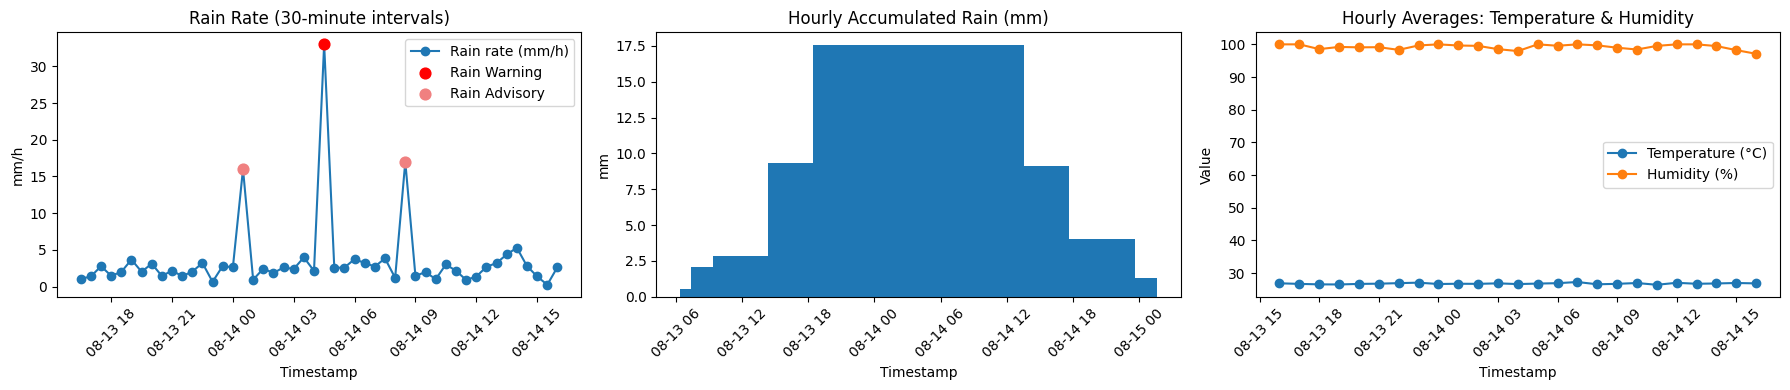

In [28]:
# -*- coding: utf-8 -*-
"""
시나리오: 30분 단위 수집 + 중간 임의 강수 경보 데이터 생성
- 24시간 동안 30분 간격 데이터 생성
- 경보 수준은 '호우주의보' / '호우경보'만 사용 (호우긴급 없음)
- 강수량(mm)은 강수강도(mm/h) * 0.5시간으로 계산 (구간 누적치)
- 1시간 단위로 리샘플링하여 요약 (온도/습도=평균, 강수량=합계)
- 시각화 텍스트는 영어, 경보 색상:
  - Rain Warning: 빨간색
  - Rain Advisory: 옅은 빨간색(light red)
"""

import os
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# ---------------------------
# 환경설정
# ---------------------------
CITY_NAME = "Seoul"   # 현재 날씨를 가져올 도시명
API_KEY = os.getenv("OPENWEATHER_API_KEY", "your_api_key")  # API 키
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"
UNITS = "metric"      # 섭씨 단위

FREQ = "30min"        # 데이터 수집 주기 (30분)
HOURS = 24            # 생성할 총 기간 (24시간)
PERIODS = int((60 // 30) * HOURS)  # 전체 데이터 포인트 개수 (24시간/30분=48개)
INTERVAL_HOURS = 0.5  # 30분을 시간 단위로 변환 (0.5h)
# DO_PLOT = True        # True일 경우 시각화 실행

# 강수 경보 기준 (mm/h)
RAIN_ADVISORY_RATE = 15.0   # 호우주의보 기준 (light red)
RAIN_WARNING_RATE = 30.0    # 호우경보 기준 (red)

# ---------------------------
# 현재 날씨 데이터 가져오기 함수
# ---------------------------
def get_current_weather(city_name: str):
    """
    OpenWeather API를 이용하여 현재 기온, 습도, 강수량(1시간 기준)을 가져온다.
    실패 시 기본값(26도, 60%, 강수량 0) 반환.
    """
    params = {'q': city_name, 'appid': API_KEY, 'units': UNITS}
    try:
        resp = requests.get(BASE_URL, params=params, timeout=10)
        resp.raise_for_status()
        data = resp.json()
        temp_c = float(data['main']['temp'])
        humi = float(data['main']['humidity'])
        rain_1h = float(data.get('rain', {}).get('1h', 0.0))  # 지난 1시간 누적 강수량
        return temp_c, humi, rain_1h
    except Exception as e:
        print(f"[Info] API 호출 실패, 기본값 사용: {e}")
        return 26.0, 60.0, 0.0

# ---------------------------
# 강수량에 따른 경보 분류 함수
# ---------------------------
def classify_rain_level(rate: float) -> str | None:
    """
    강수강도(mm/h)에 따라 경보 수준 문자열 반환.
    """
    if rate >= RAIN_WARNING_RATE:
        return "Rain Warning"
    if rate >= RAIN_ADVISORY_RATE:
        return "Rain Advisory"
    return None

# ---------------------------
# 기상 데이터 생성 준비
# ---------------------------
base_temp, base_humi, base_rain_rate = get_current_weather(CITY_NAME)

# 현재 시각을 가장 가까운 30분 단위로 맞춘 시작 시간 계산
now = datetime.now()
start = now.replace(minute=(0 if now.minute < 30 else 30), second=0, microsecond=0)

# 24시간 동안 30분 간격으로 DatetimeIndex 생성
idx = pd.date_range(start=start, periods=PERIODS, freq=FREQ)

# ---------------------------
# 30분 간격 데이터 생성 (기본값 + 약간의 변동)
# ---------------------------
rng = np.random.default_rng(42)
# 온도: 기본값 ±0.4℃ 변동
temp_series = base_temp + rng.normal(0, 0.4, size=PERIODS)
# 습도: 기본값 ±2% 변동 (0~100% 범위 제한)
humi_series = np.clip(base_humi + rng.normal(0, 2.0, size=PERIODS), 0, 100)
# 강수강도: 기본값 ±1.0 mm/h 변동 (0 이상)
rain_rate_series = np.clip(base_rain_rate + rng.normal(0, 1.0, size=PERIODS), 0, None)

# ---------------------------
# 중간 지점에 임의 경보 삽입
# ---------------------------
i1, i2, i3 = PERIODS // 3, PERIODS // 2, (PERIODS * 2) // 3
rain_rate_series[i1] = RAIN_ADVISORY_RATE + 1.0   # 호우주의보
rain_rate_series[i2] = RAIN_WARNING_RATE + 3.0    # 호우경보
rain_rate_series[i3] = RAIN_ADVISORY_RATE + 2.0   # 호우주의보

# 구간 강수량(mm) 계산 = 강수강도(mm/h) * 0.5시간
rain_amount_series = rain_rate_series * INTERVAL_HOURS

# ---------------------------
# DataFrame 구성
# ---------------------------
df = pd.DataFrame({
    "temperature_c": temp_series,
    "humidity_per": humi_series,
    "rain_rate_mmph": rain_rate_series,
    "rain_mm": rain_amount_series
}, index=idx)

print("\n--- 30분 단위 원본 데이터 (일부) ---\n")
print(df.head(6))
print("-" * 60)

# ---------------------------
# 1시간 단위로 리샘플링 ('1h' 소문자 사용)
# ---------------------------
agg = {
    "temperature_c": "mean",    # 온도 평균
    "humidity_per": "mean",     # 습도 평균
    "rain_rate_mmph": "mean",   # 강수강도 평균
    "rain_mm": "sum"            # 강수량 합계
}
hourly = df.resample("1h").agg(agg)
print("\n--- 1시간 리샘플링 요약 ---\n")
print(hourly.head(6))
print("-" * 60)

# ---------------------------
# 경보 발생 목록 출력
# ---------------------------
print("\n--- 강수 경보 발생 시각 ---")
has_alert = False
for ts, rate in df["rain_rate_mmph"].items():
    lvl = classify_rain_level(rate)
    if lvl:
        has_alert = True
        print(f"[{lvl}] {ts} | 강수강도 ≈ {rate:.1f} mm/h, 구간 강수량 ≈ {rate*INTERVAL_HOURS:.2f} mm")
if not has_alert:
    print("경보 없음")
print("-" * 60)

# ---------------------------
# 시각화 (1행 3열 구성)
# ---------------------------
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # 1행 3열 레이아웃

# (1) 강수강도 + 경보 표시
axes[0].plot(df.index, df["rain_rate_mmph"], marker="o", linewidth=1.5, label="Rain rate (mm/h)")
advisory_mask = df["rain_rate_mmph"] >= RAIN_ADVISORY_RATE
warning_mask  = df["rain_rate_mmph"] >= RAIN_WARNING_RATE

# 호우경보 (빨간색)
axes[0].scatter(df.index[warning_mask],
                df.loc[warning_mask, "rain_rate_mmph"],
                color="red", s=60, zorder=3, label="Rain Warning")
# 호우주의보 (옅은 빨간색, 경보 제외)
only_advisory_mask = advisory_mask & (~warning_mask)
axes[0].scatter(df.index[only_advisory_mask],
                df.loc[only_advisory_mask, "rain_rate_mmph"],
                color="lightcoral", s=60, zorder=3, label="Rain Advisory")

axes[0].set_title("Rain Rate (30-minute intervals)")
axes[0].set_xlabel("Timestamp")
axes[0].set_ylabel("mm/h")
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# (2) 1시간 누적 강수량
axes[1].bar(hourly.index, hourly["rain_mm"])
axes[1].set_title("Hourly Accumulated Rain (mm)")
axes[1].set_xlabel("Timestamp")
axes[1].set_ylabel("mm")
axes[1].tick_params(axis='x', rotation=45)

# (3) 시간별 평균 온도/습도
axes[2].plot(hourly.index, hourly["temperature_c"], marker="o", label="Temperature (°C)")
axes[2].plot(hourly.index, hourly["humidity_per"], marker="o", label="Humidity (%)")
axes[2].set_title("Hourly Averages: Temperature & Humidity")
axes[2].set_xlabel("Timestamp")
axes[2].set_ylabel("Value")
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()